In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv
/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset_Description.pdf


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
print(data.shape)
data.head()

(1000, 14)


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


## Performing EDA to analyze dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [5]:
data.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [6]:
data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


### Features Explanation
- `patiendid` - **Patient Identification Number**
- `age` - **Age of the patient**
- `gender` - **Gender of the patient** - (0 => Female, 1 => Male)
- `chestpain` - **Chest pain type** - (0 => typical angina, 1 => atypical angina, 2 => non-anginal pain, and 3 => asymptomatic)
- `restingBP` - **Resting Blood Pressure** - (94-200 in mm HG)
- `serumcholestrol` - **Serum Cholesterol** - (126-564 in mg/dl)
- `fastingbloodsugar` - **Fasting blood sugar** - (0, 1 > 120 mg/dl) - (0 => false, 1 => true)
- `restingelectro` - **Resting electrocardiogram results** - (Value 0: normal, Value 1: having ST-T wave abnormality, and Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- `maxheartrate` - **Maximum heart rate achieved** - (71-202)
- `exerciseangia` - **Exercise induced angina** - (0 => no, 1 => yes)
- `oldpeak` - **Oldpeak=ST** - (0 - 6.2)
- `slope` - **Slope of the peak exercise ST segment** - (1-upsloping, 2-flat, 3-downsloping)
- `noofmajorvessels` - **Number of major vessels** - 0, 1, 2, 3
- `target` - **Classification** - (0 => absence of heart disease, 1 => presence of heart disease)

##### Checking for unique values of all the features

In [7]:
def uniqueData(col):
    print(f'{data[col].value_counts()}\n')

for col in data.columns:
    uniqueData(col)

patientid
103368     1
6865627    1
6757890    1
6769686    1
6781392    1
          ..
3336723    1
3347947    1
3353178    1
3374737    1
9990855    1
Name: count, Length: 1000, dtype: int64

age
20    28
58    23
24    22
76    22
73    21
      ..
41    11
75    11
35    11
65    11
49    10
Name: count, Length: 61, dtype: int64

gender
1    765
0    235
Name: count, dtype: int64

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64

restingBP
127    26
130    25
143    23
126    23
125    22
       ..
188     4
95      3
148     3
179     3
146     2
Name: count, Length: 95, dtype: int64

serumcholestrol
0      53
268    22
354    21
248    19
336    13
       ..
446     1
166     1
292     1
358     1
434     1
Name: count, Length: 344, dtype: int64

fastingbloodsugar
0    704
1    296
Name: count, dtype: int64

restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64

maxheartrate
186    20
138    19
145    19
168    18
156    17
       ..
87      

##### Insights from above information
- `patientid` feature is of no use.
- `gender`, `chestpain`, `fastingbloodsugar`, `restingrelectro`, `exerciseangia`, `slope`, `noofmajorvessels`, and `target` features have discrete values.
- `age`, `restingBP`, `serumcholestrol`, `maxheartrate`, and `oldpeak` features have continuous values.

In [8]:
data.drop(columns=['patientid'], axis=1, inplace=True)
data.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [9]:
target = 'target'

### Correlation of other features correspond to target feature

In [10]:
correlation = data.corr()
correlation[target].sort_values(ascending=False)

target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
fastingbloodsugar    0.303233
maxheartrate         0.228343
serumcholestrol      0.195340
oldpeak              0.098053
gender               0.015769
age                  0.008356
exerciseangia       -0.039874
Name: target, dtype: float64

- Visualize the data graphically

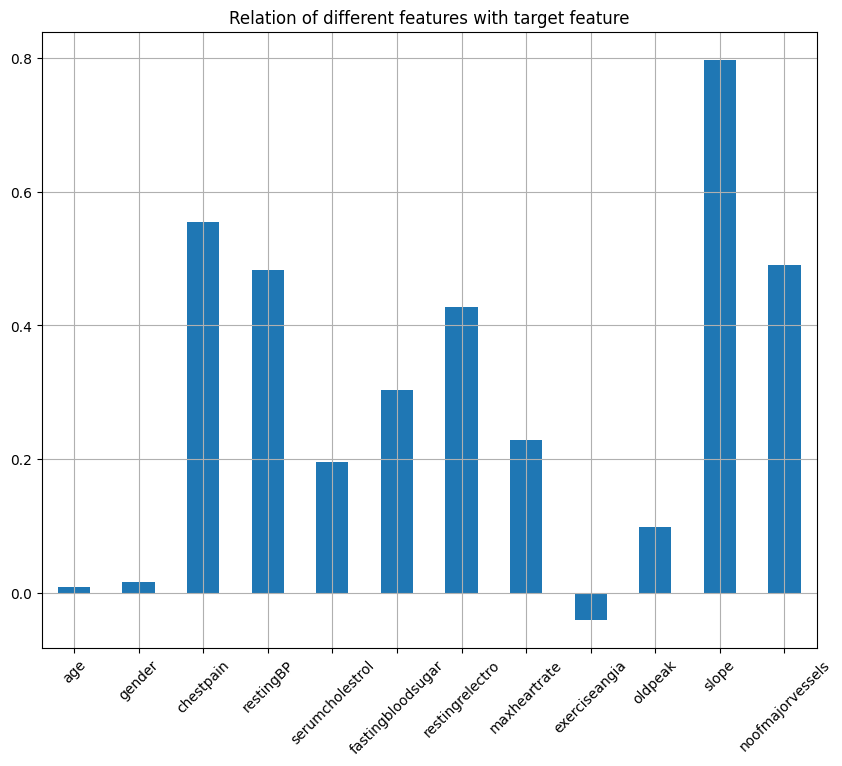

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

data2 = data.drop(columns=[target], axis=1)
data2.corrwith(data[target]).plot.bar(figsize=(10, 8), title=f'Relation of different features with {target} feature', rot=45, grid=True)
plt.savefig('target_correlation.png')
plt.show()

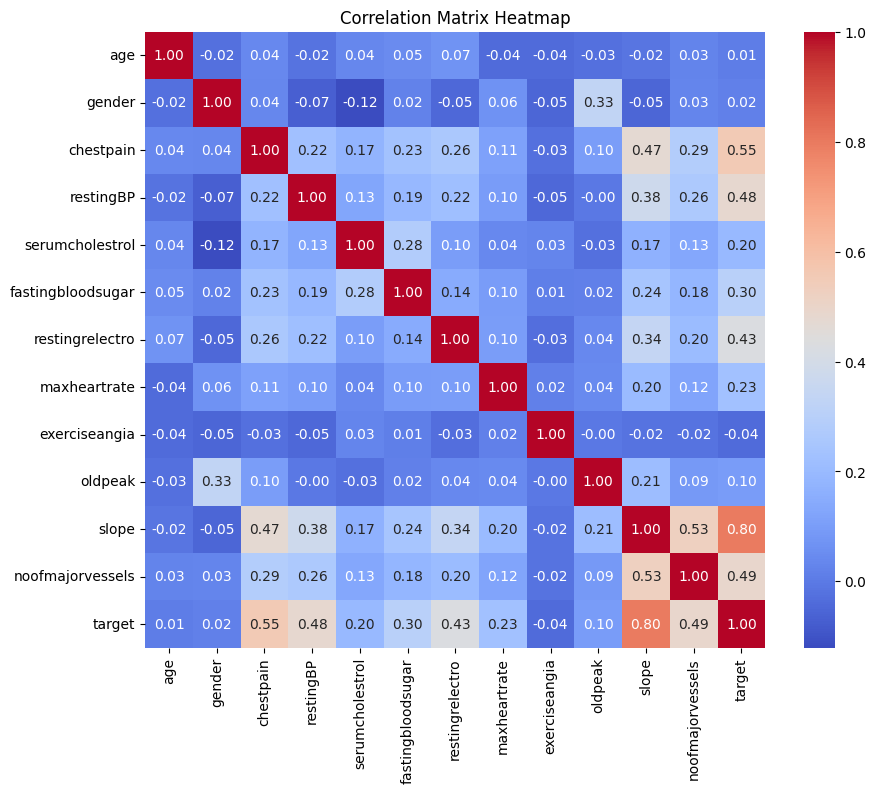

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

#### Visualize the different features correspond to target variable

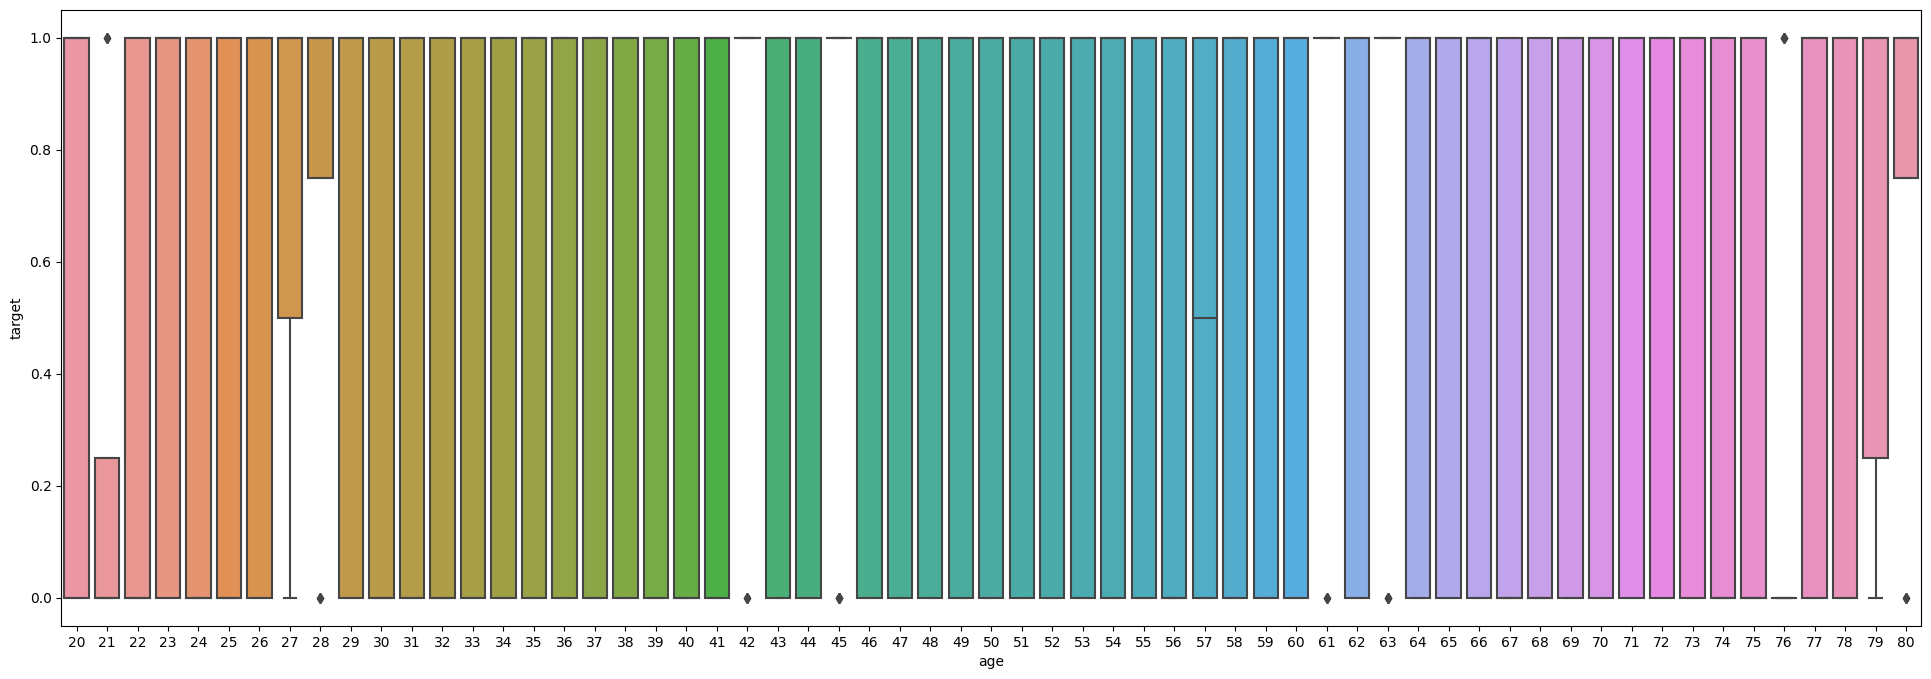

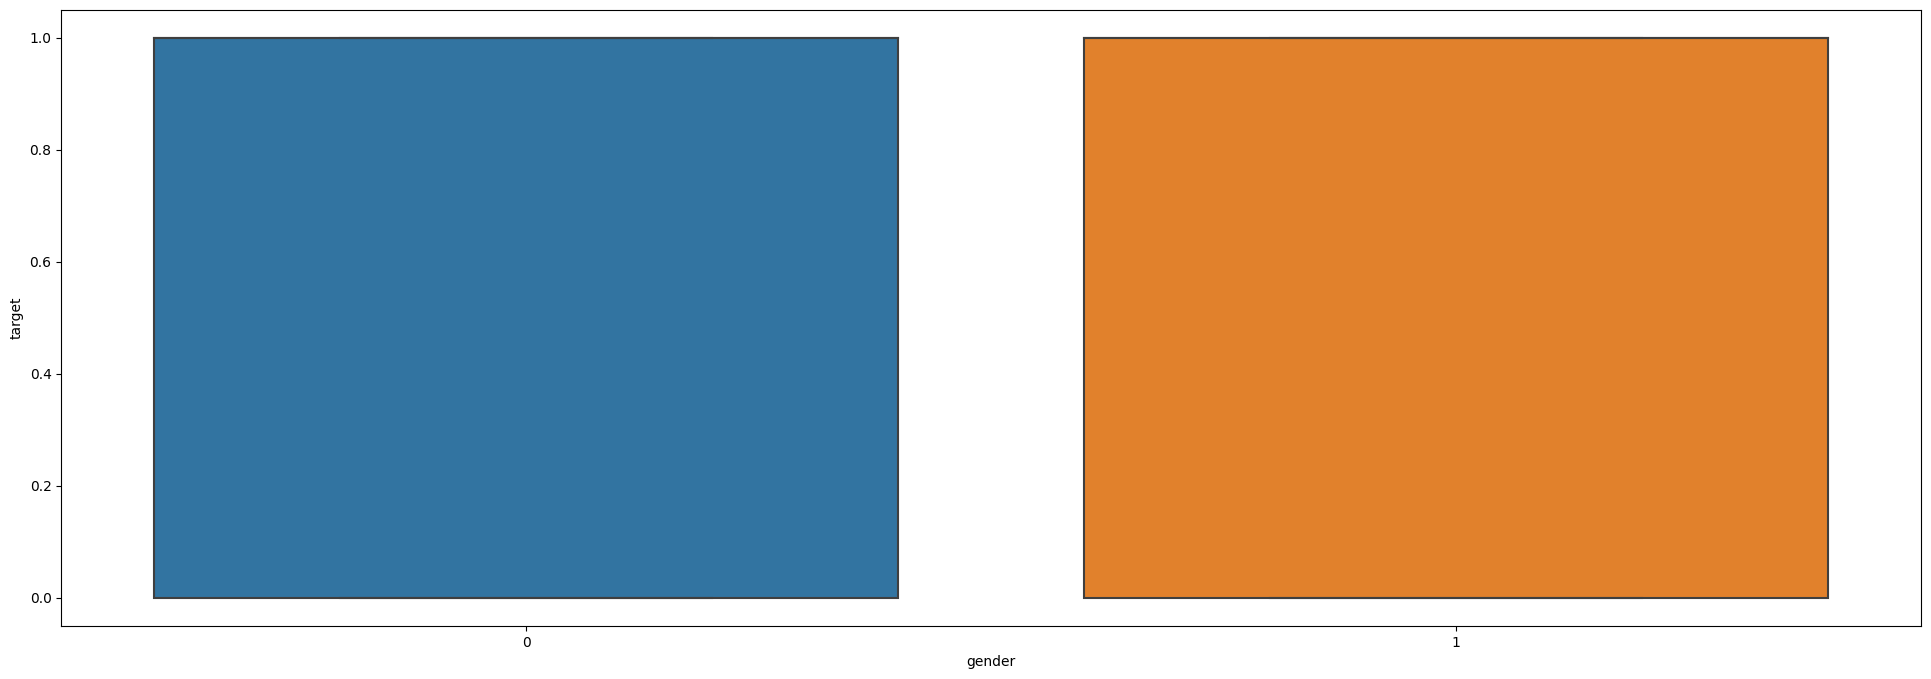

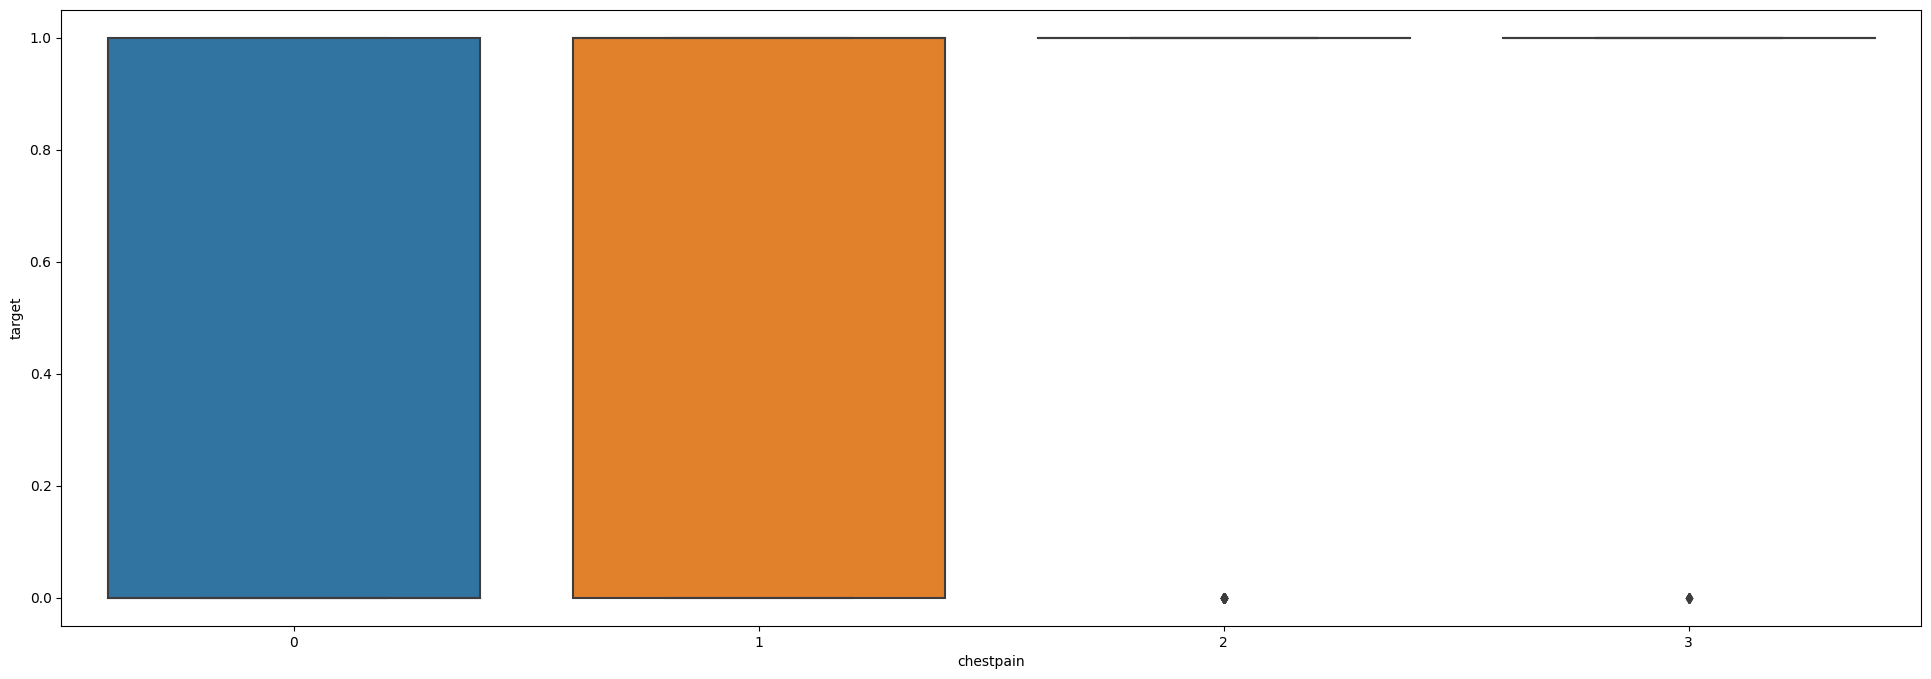

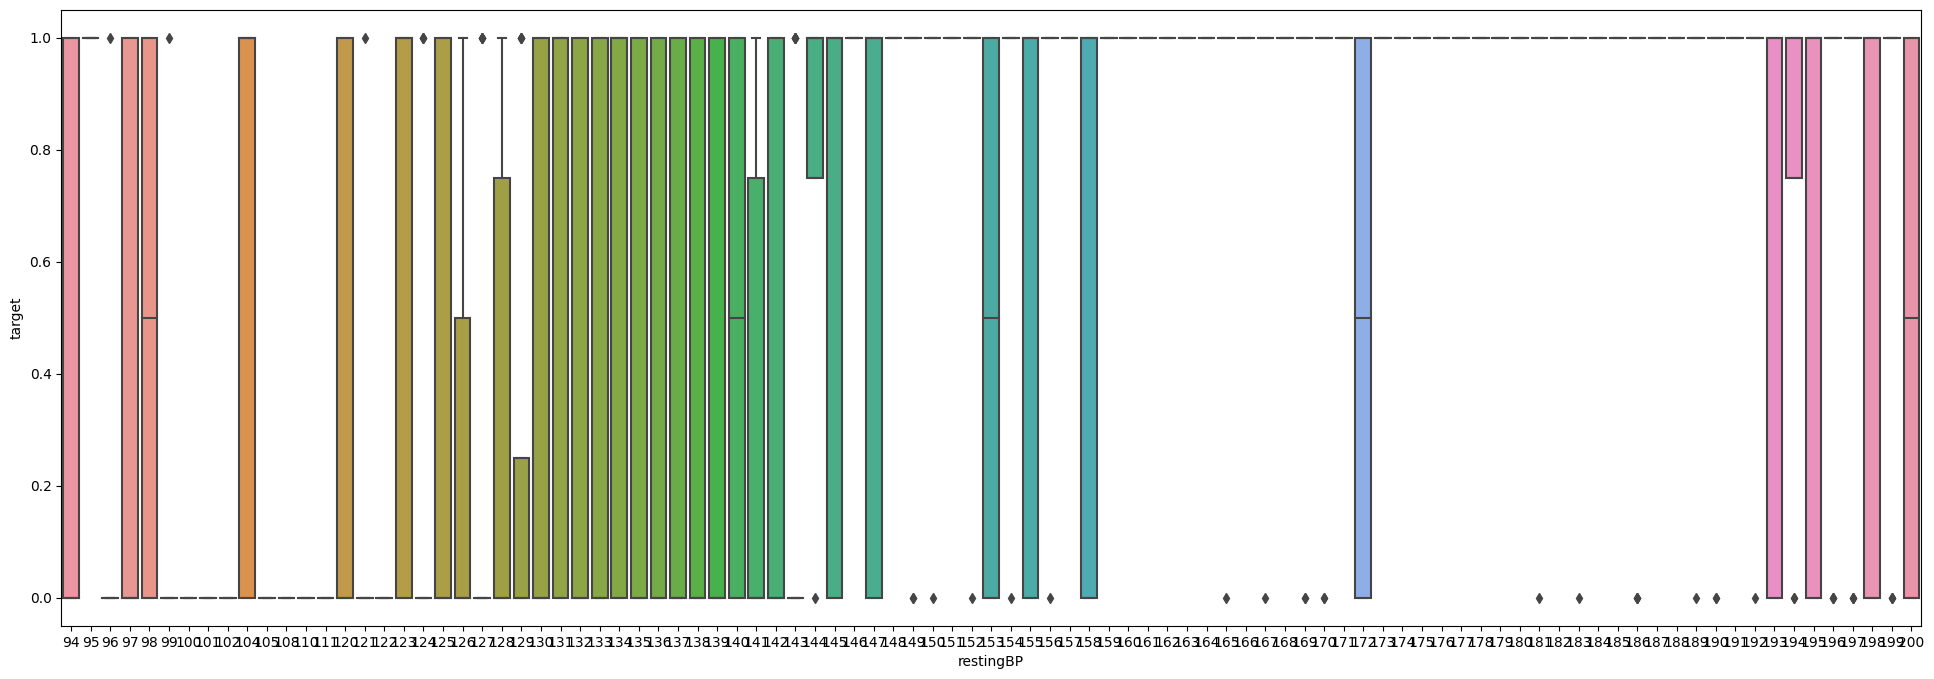

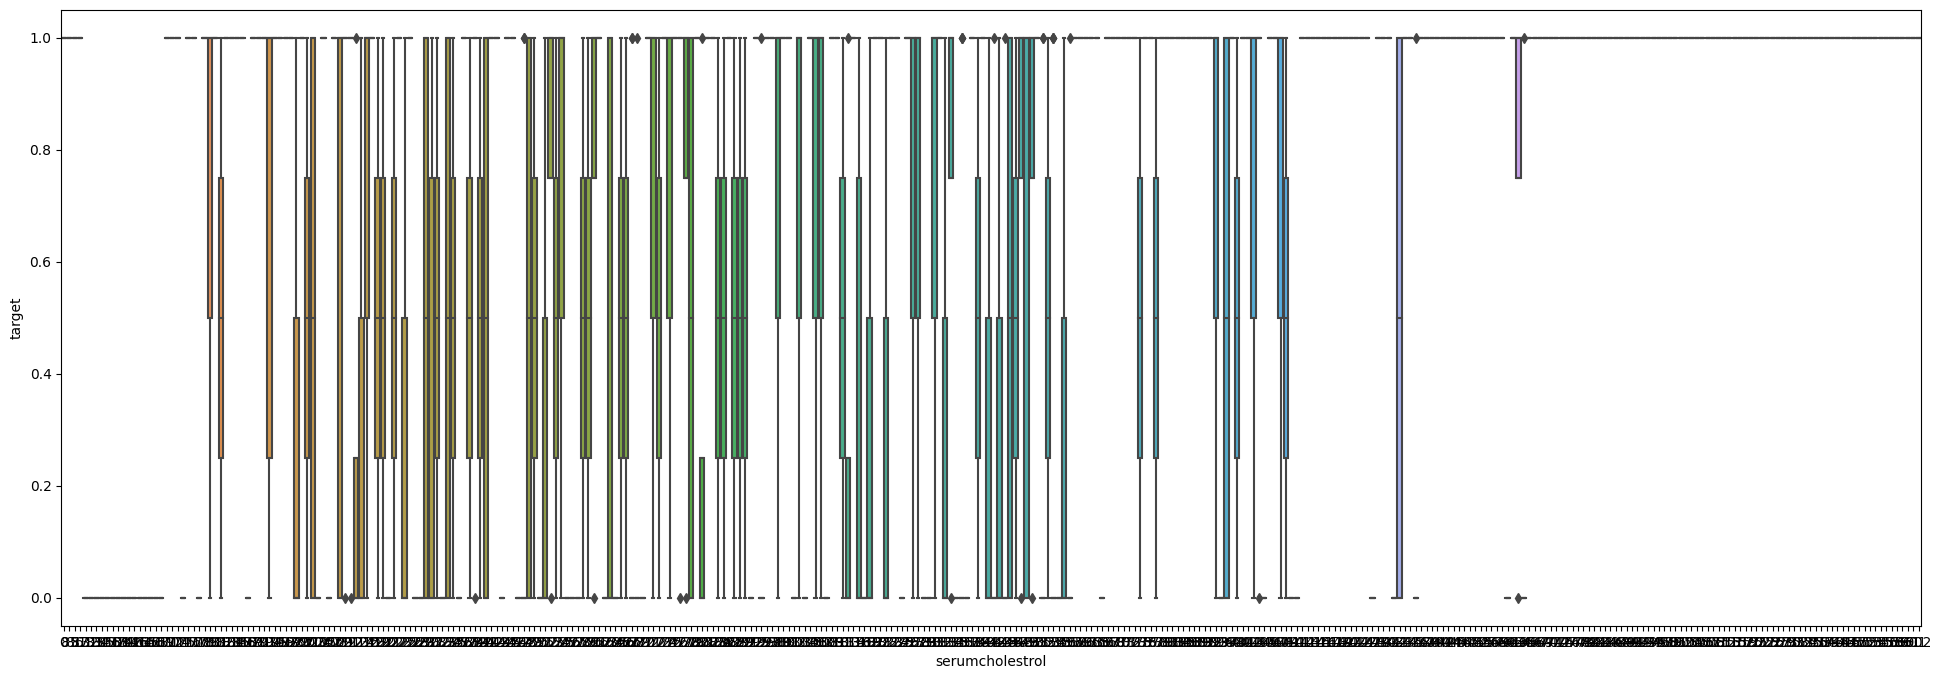

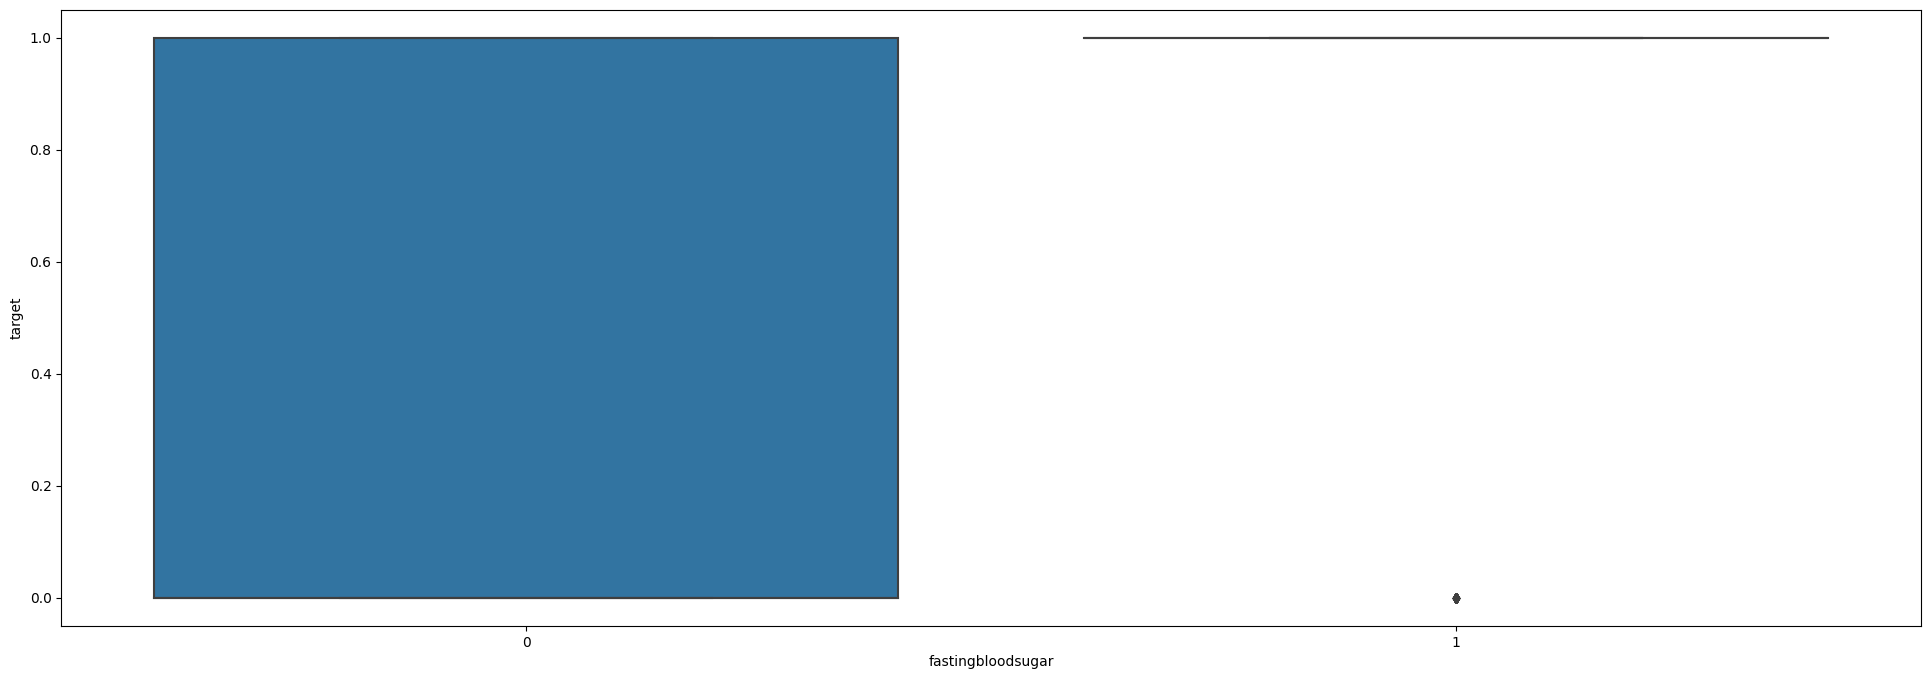

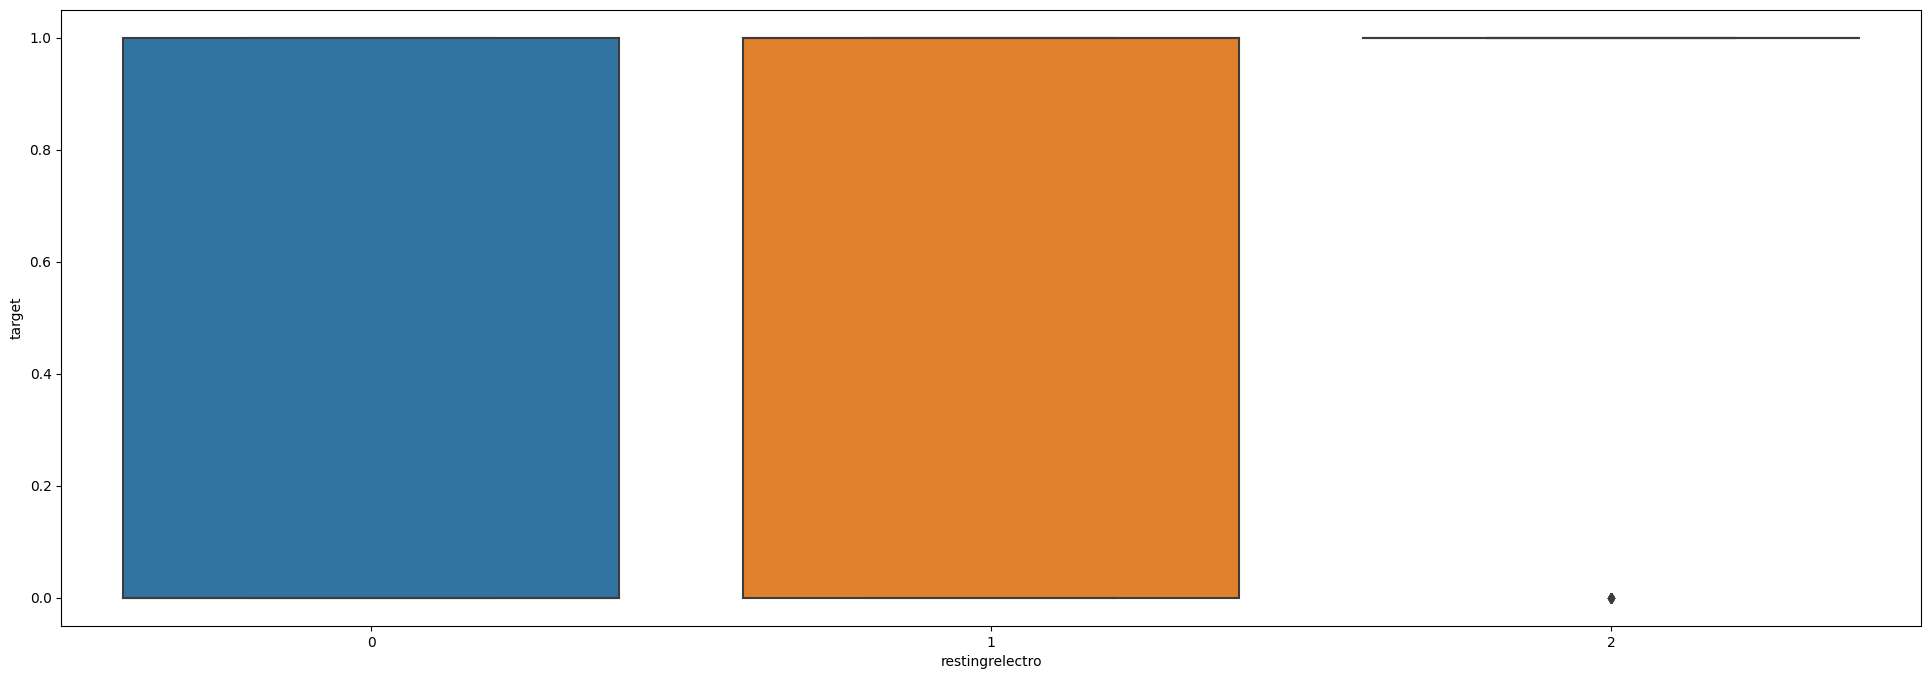

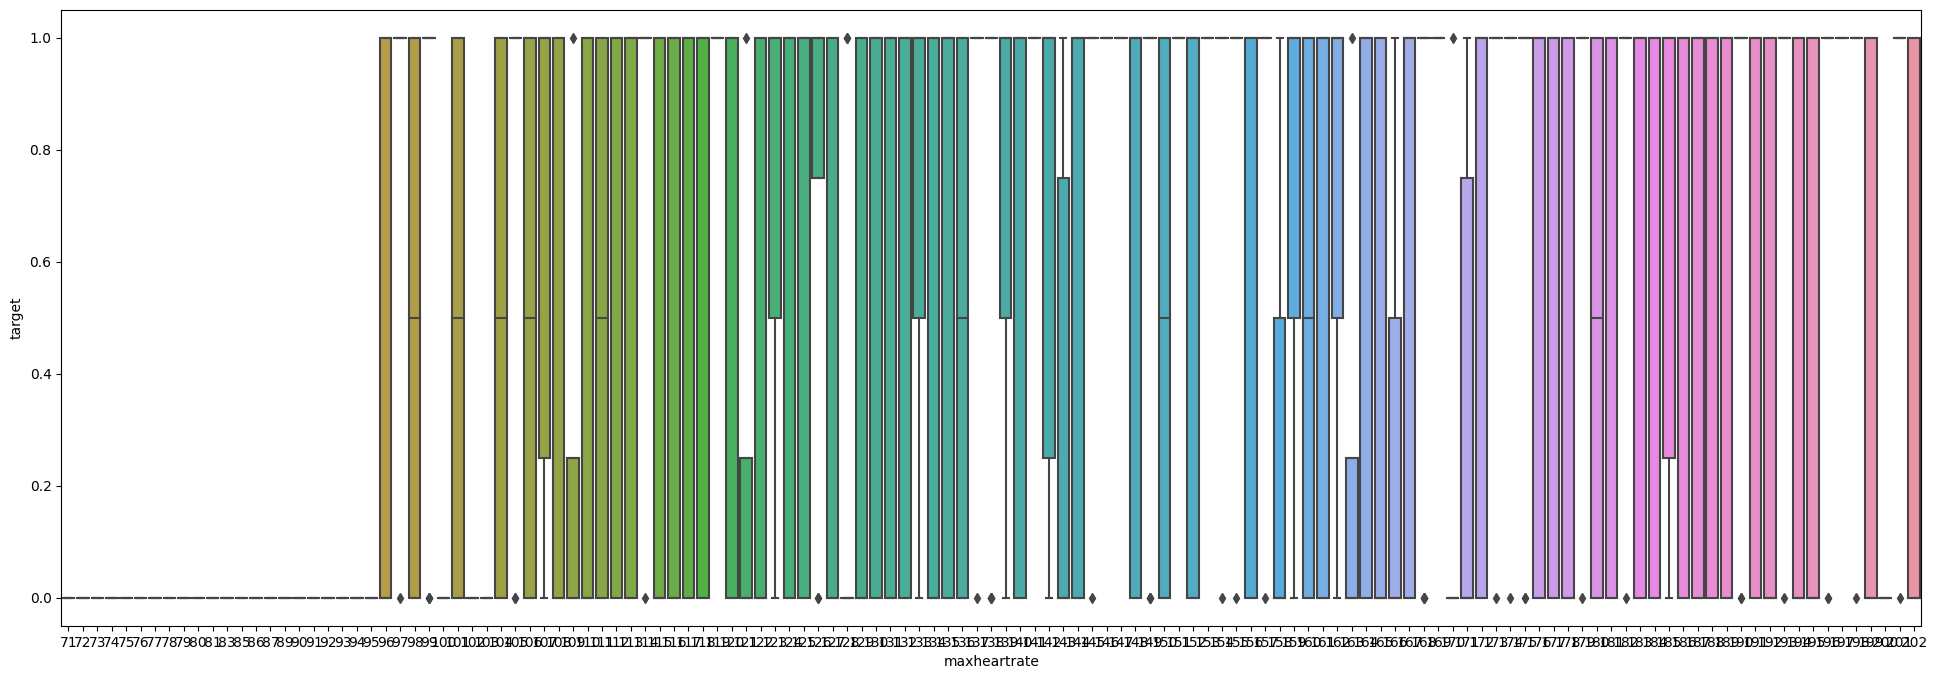

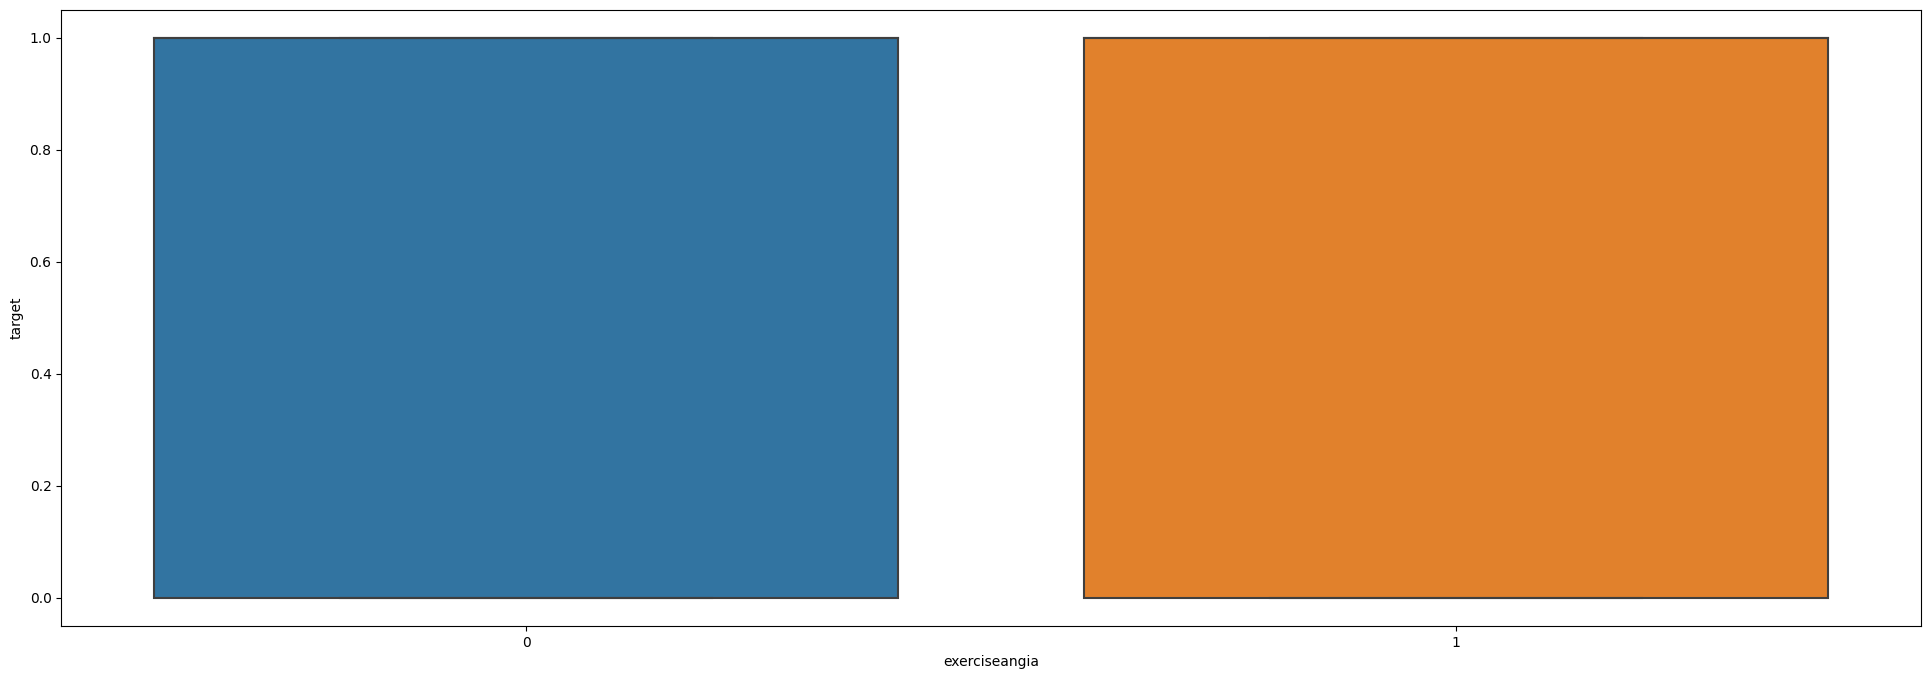

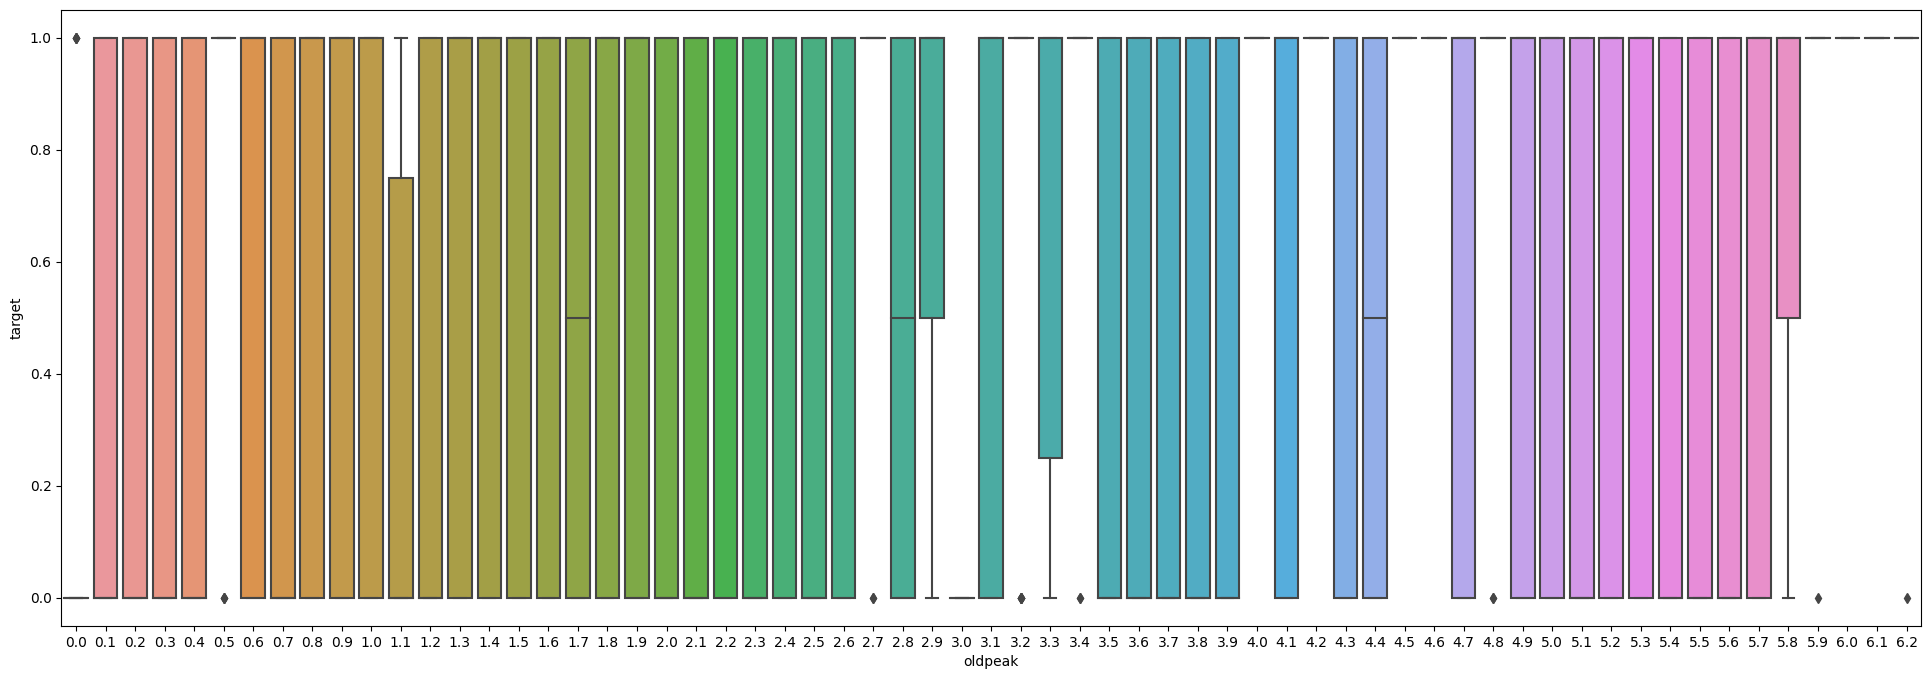

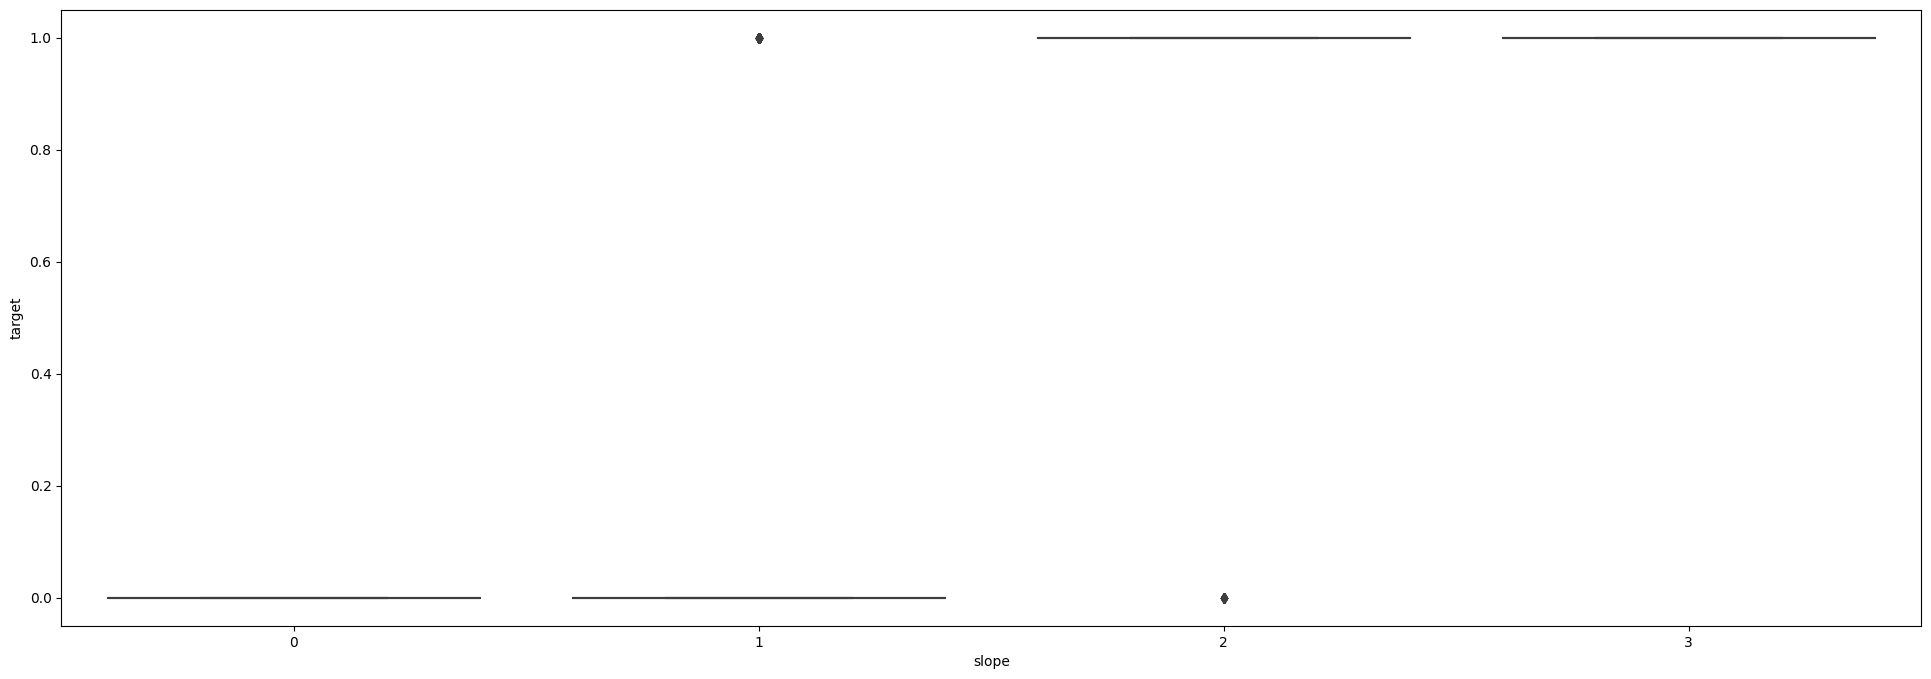

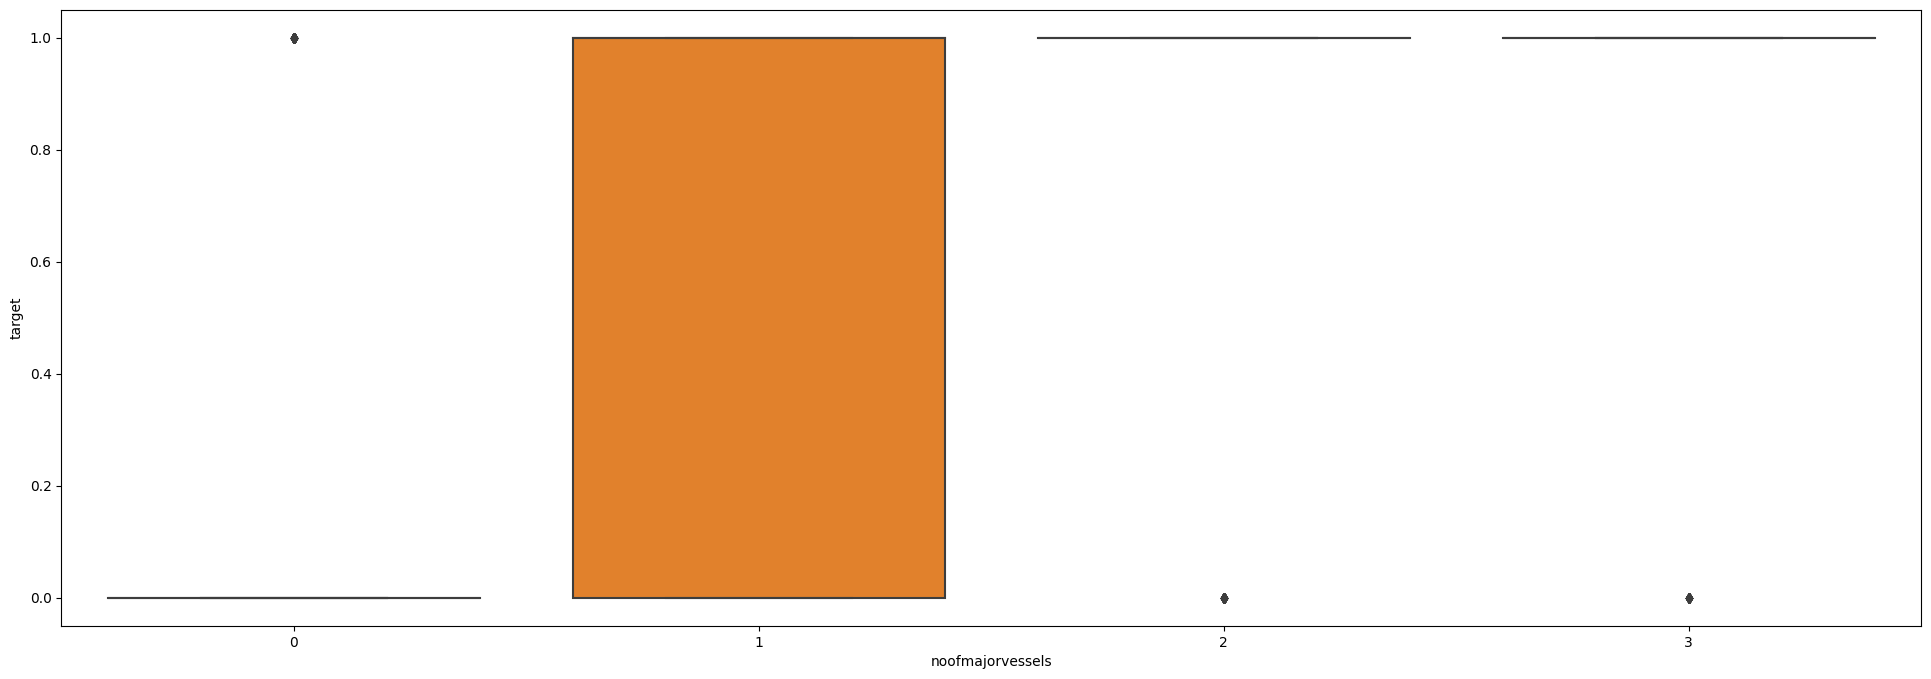

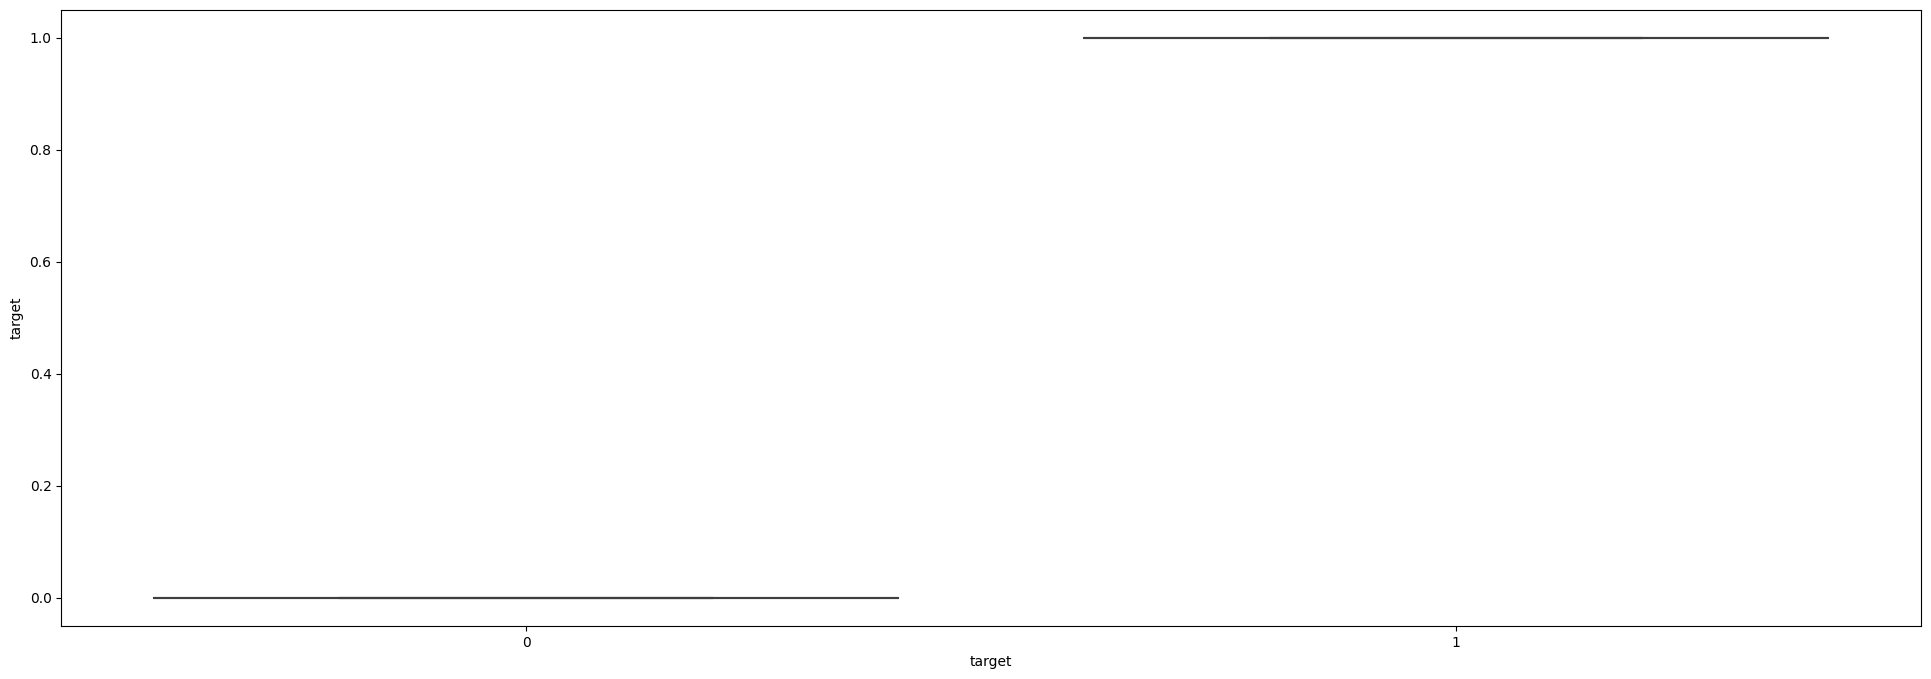

In [13]:
def plot(col):
    plt.figure(figsize=(24, 8))
    sns.boxplot(x=col, y=target, data=data)
    plt.savefig(f'{col}_feature.png')
    plt.show()

for col in data.columns:
    plot(col)

### Building the model and train it

In [14]:
x = data.drop(columns=[target], axis=1)
y = data[[target]]

print(x.shape)
print(y.shape)

(1000, 12)
(1000, 1)


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

print('Training set:', xtrain.shape, ytrain.shape)
print('Testing set:', xtest.shape, ytest.shape)

Training set: (800, 12) (800, 1)
Testing set: (200, 12) (200, 1)


#### Building the model

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

##### Creating a dataframe which stores accuracies of all the models

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
results = pd.DataFrame(columns=['Model', 'MSE_train', 'R2_train', 'MSE_test', 'R2_test'])

##### Linear Regression Model

In [18]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [19]:
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Linear Regression', mse_train, r2_train, mse_test, r2_test]

##### Ridge Regression Model

In [20]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)

Ridge()

In [21]:
ypred_train = ridge.predict(xtrain)
ypred_test = ridge.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Ridge Regression', mse_train, r2_train, mse_test, r2_test]

##### Elastic Net Regression Model

In [22]:
elastic = ElasticNet()
elastic.fit(xtrain, ytrain)

ElasticNet()

In [23]:
ypred_train = elastic.predict(xtrain)
ypred_test = elastic.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Elastic Net Regression', mse_train, r2_train, mse_test, r2_test]

##### Decision Tree Regression Model

In [24]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [25]:
ypred_train = dtr.predict(xtrain)
ypred_test = dtr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Decision Tree Regression', mse_train, r2_train, mse_test, r2_test]

##### Random Forest Regressor Model

In [26]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

/tmp/ipykernel_1582/3889765417.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


RandomForestRegressor()

In [27]:
ypred_train = rfr.predict(xtrain)
ypred_test = rfr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Random Forest Regression', mse_train, r2_train, mse_test, r2_test]

##### XG Boost Regressor Model

In [28]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
ypred_train = xgb.predict(xtrain)
ypred_test = xgb.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['XG Boost Regression', mse_train, r2_train, mse_test, r2_test]

##### KNN Regression Model

In [30]:
knn = KNeighborsRegressor()
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [31]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['KNN Regression', mse_train, r2_train, mse_test, r2_test]

### Let's see the accuracies of different models in the increasing order of 'Testing MSE'

In [32]:
results = results.sort_values(by='MSE_test', ascending=True)
results

,Model,MSE_train,R2_train,MSE_test,R2_test
4,Random Forest Regression,0.002946,0.987915,0.023432,0.903483
5,XG Boost Regression,0.000002,0.999993,0.027463,0.886879
3,Decision Tree Regression,0.000000,1.000000,0.035000,0.855834
1,Ridge Regression,0.063654,0.738905,0.059288,0.755792
0,Linear Regression,0.063654,0.738907,0.059305,0.755721
6,KNN Regression,0.094450,0.612590,0.125600,0.482649
2,Elastic Net Regression,0.180585,0.259287,0.155394,0.359926


- `Random Forest Regression Model` and `XG Boost Regression Model` are best fitted on it.

In [33]:
# features = [age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels]
test = np.array([53,1,2,171,0,0,1,147,0,5.3,3,3]).reshape(1, -1)
print(test.shape)

(1, 12)


In [34]:
pred = rfr.predict(test)
pred

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.])